In [1]:
# ================================================================
# WALMART SALES FORECASTING - EXPLORATORY ANALYSIS
# Author: Daniel Kattoula
# Date: January 2026
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")



 Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


In [2]:

# Load the main dataset
df = pd.read_csv('train.csv')

print(" Data loaded successfully!")
print(f"\nDataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
print(df.head())

 Data loaded successfully!

Dataset shape: 421,570 rows × 5 columns

First few rows:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [3]:

print("=" * 60)
print("DATA OVERVIEW")
print("=" * 60)

# Basic info
print("\n Column Information:")
print(df.info())

print("\n Summary Statistics:")
print(df.describe())

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Unique Values:")
print(f"Number of stores: {df['Store'].nunique()}")
print(f"Number of departments: {df['Dept'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

DATA OVERVIEW

 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

 Summary Statistics:
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  69

In [4]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter

# Add holiday indicator (simplified - weeks with IsHoliday=True)
df['IsHoliday'] = df['IsHoliday'].astype(int)

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

print(" Date features created successfully!")
print("\nNew columns added:")
print(df[['Date', 'Year', 'Month', 'Week', 'Quarter', 'IsHoliday']].head())

 Date features created successfully!

New columns added:
        Date  Year  Month  Week  Quarter  IsHoliday
0 2010-02-05  2010      2     5        1          0
1 2010-02-05  2010      2     5        1          0
2 2010-02-05  2010      2     5        1          0
3 2010-02-05  2010      2     5        1          0
4 2010-02-05  2010      2     5        1          0


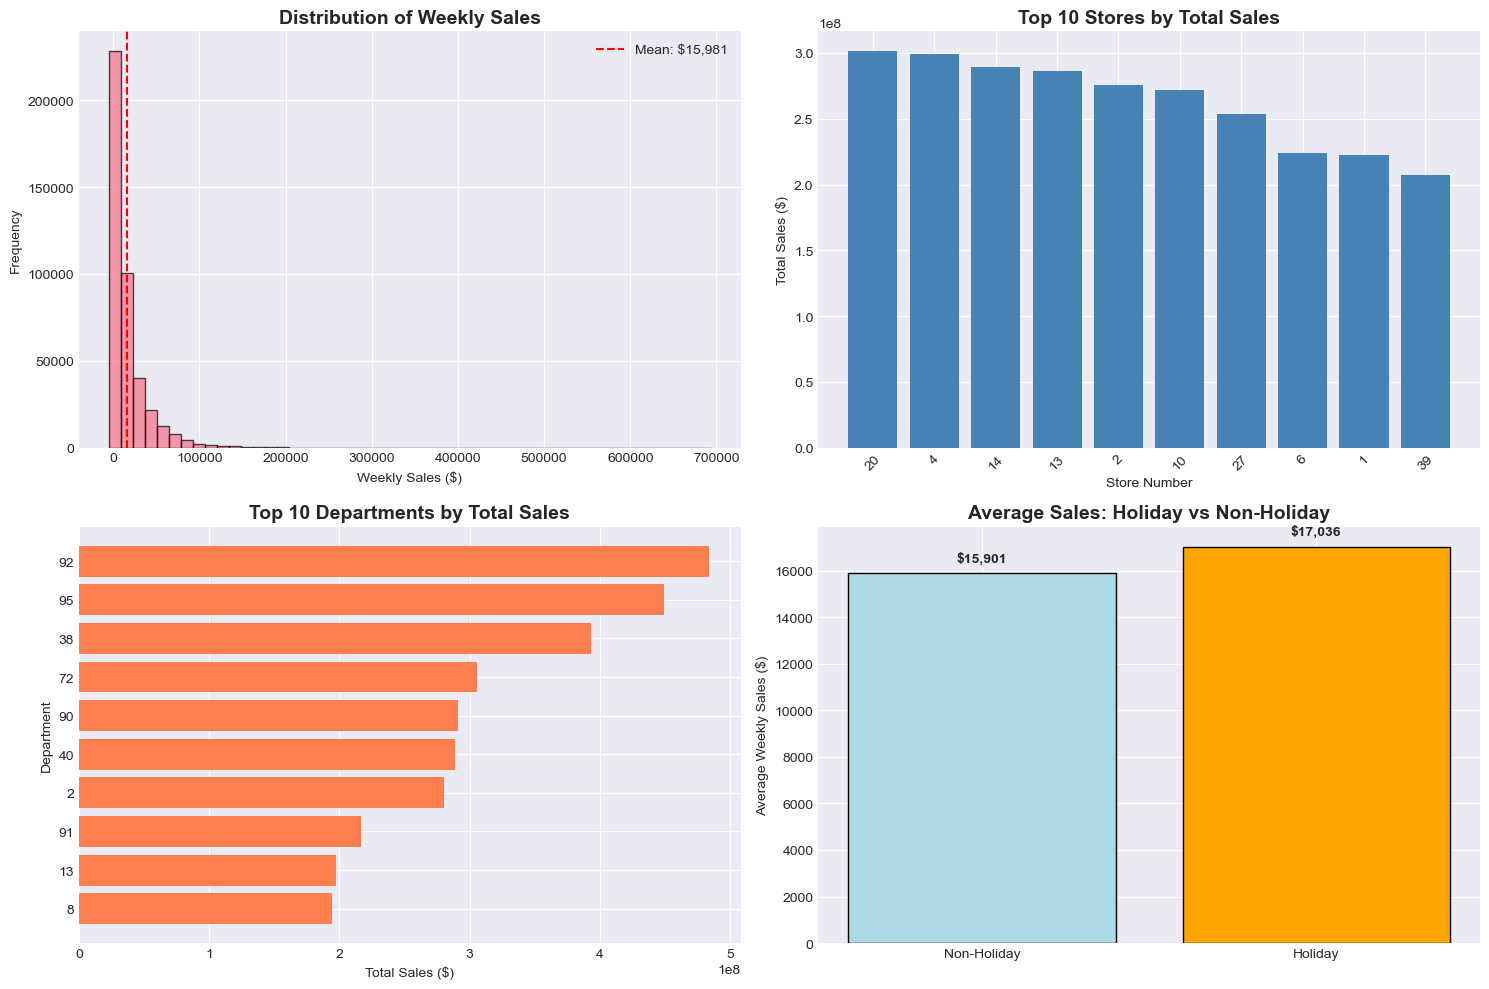

 Sales distribution plots created!


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribution of weekly sales
axes[0, 0].hist(df['Weekly_Sales'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Weekly Sales', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Weekly Sales ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Weekly_Sales'].mean(), color='red', linestyle='--', 
                   label=f'Mean: ${df["Weekly_Sales"].mean():,.0f}')
axes[0, 0].legend()

# 2. Sales by store (top 10)
top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(10)
axes[0, 1].bar(range(len(top_stores)), top_stores.values, color='steelblue')
axes[0, 1].set_title('Top 10 Stores by Total Sales', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Store Number')
axes[0, 1].set_ylabel('Total Sales ($)')
axes[0, 1].set_xticks(range(len(top_stores)))
axes[0, 1].set_xticklabels(top_stores.index, rotation=45)

# 3. Sales by department (top 10)
top_depts = df.groupby('Dept')['Weekly_Sales'].sum().nlargest(10)
axes[1, 0].barh(range(len(top_depts)), top_depts.values, color='coral')
axes[1, 0].set_title('Top 10 Departments by Total Sales', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Total Sales ($)')
axes[1, 0].set_ylabel('Department')
axes[1, 0].set_yticks(range(len(top_depts)))
axes[1, 0].set_yticklabels(top_depts.index)
axes[1, 0].invert_yaxis()

# 4. Holiday vs Non-Holiday sales
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
axes[1, 1].bar(['Non-Holiday', 'Holiday'], holiday_sales.values, 
               color=['lightblue', 'orange'], edgecolor='black')
axes[1, 1].set_title('Average Sales: Holiday vs Non-Holiday', 
                     fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average Weekly Sales ($)')
for i, v in enumerate(holiday_sales.values):
    axes[1, 1].text(i, v + 500, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('sales_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Sales distribution plots created!")

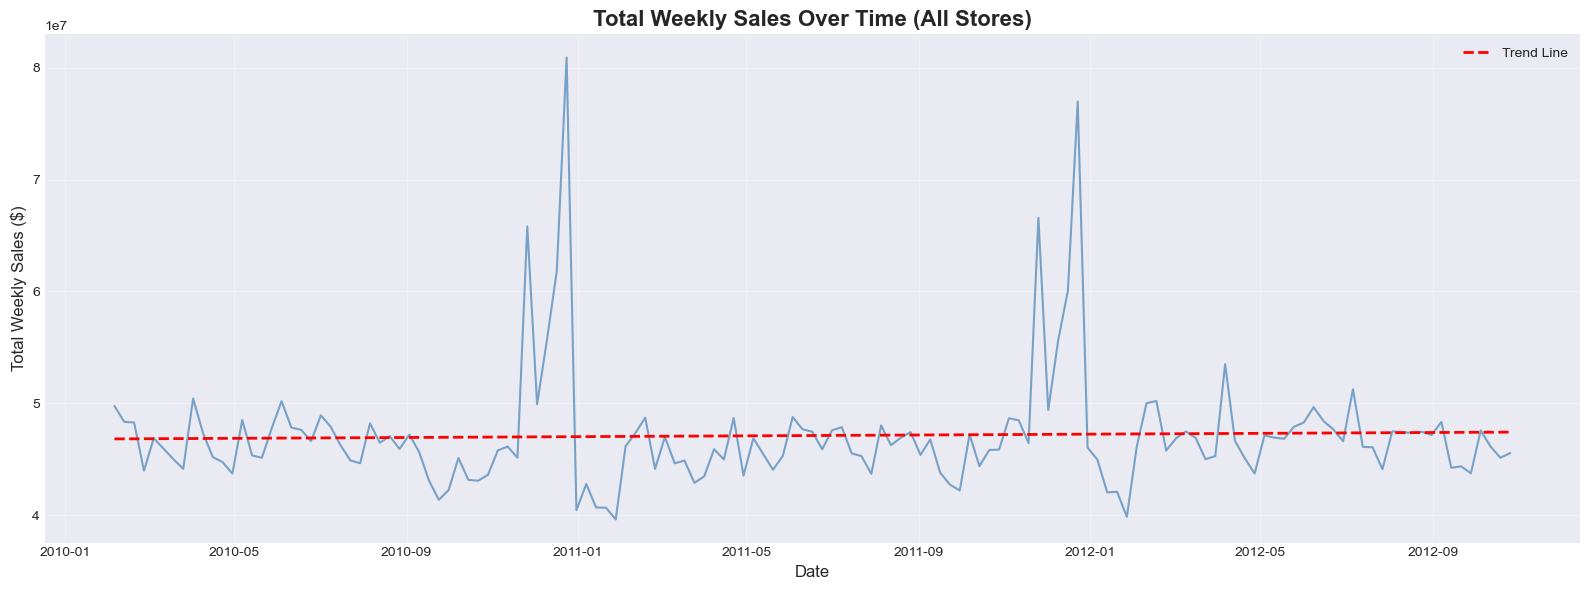

 Time series plot created!


In [6]:
# Aggregate sales by date (all stores combined)
daily_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(daily_sales['Date'], daily_sales['Weekly_Sales'], 
        linewidth=1.5, color='steelblue', alpha=0.7)
ax.set_title('Total Weekly Sales Over Time (All Stores)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Weekly Sales ($)', fontsize=12)
ax.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(range(len(daily_sales)), daily_sales['Weekly_Sales'], 1)
p = np.poly1d(z)
ax.plot(daily_sales['Date'], p(range(len(daily_sales))), 
        "r--", linewidth=2, label='Trend Line')
ax.legend()

plt.tight_layout()
plt.savefig('sales_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Time series plot created!")


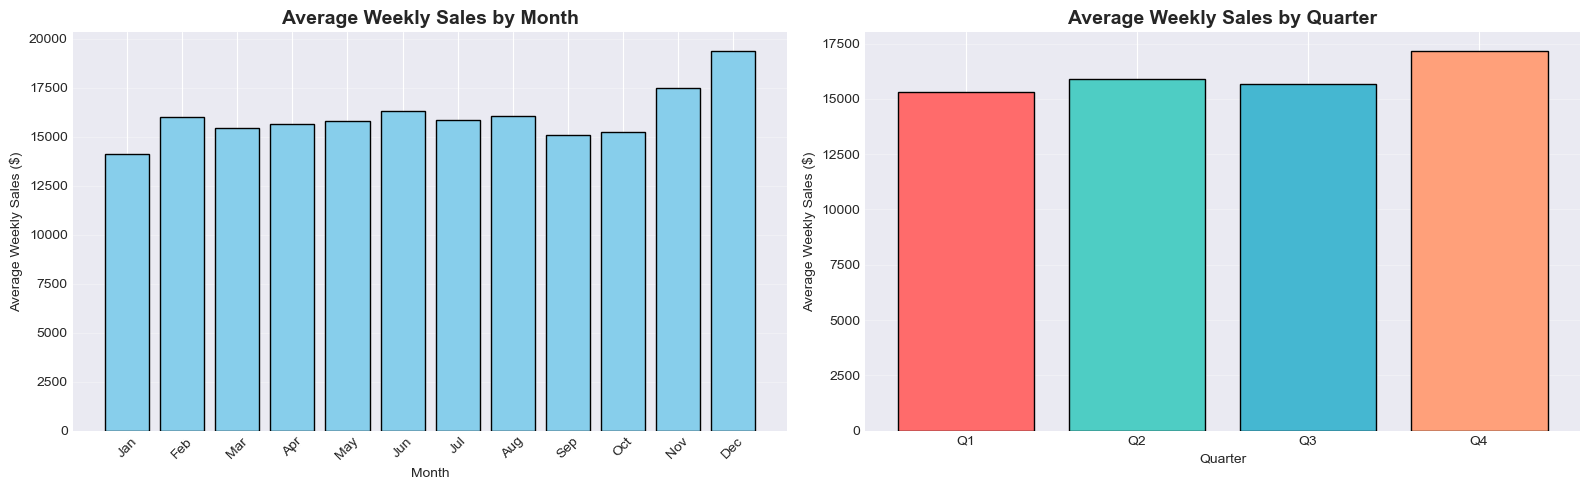

 Seasonality plots created!

 Key Seasonal Patterns:
Highest sales month: Dec
Lowest sales month: Jan


In [7]:
# Sales by month
monthly_sales = df.groupby('Month')['Weekly_Sales'].agg(['mean', 'sum']).reset_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Average sales by month
axes[0].bar(monthly_sales['Month'], monthly_sales['mean'], 
            color='skyblue', edgecolor='black')
axes[0].set_title('Average Weekly Sales by Month', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Weekly Sales ($)')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(month_names, rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Sales by quarter
quarterly_sales = df.groupby('Quarter')['Weekly_Sales'].mean()
axes[1].bar(['Q1', 'Q2', 'Q3', 'Q4'], quarterly_sales.values, 
            color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], 
            edgecolor='black')
axes[1].set_title('Average Weekly Sales by Quarter', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Average Weekly Sales ($)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('seasonality_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Seasonality plots created!")
print("\n Key Seasonal Patterns:")
print(f"Highest sales month: {month_names[monthly_sales['mean'].idxmax()]}")
print(f"Lowest sales month: {month_names[monthly_sales['mean'].idxmin()]}")

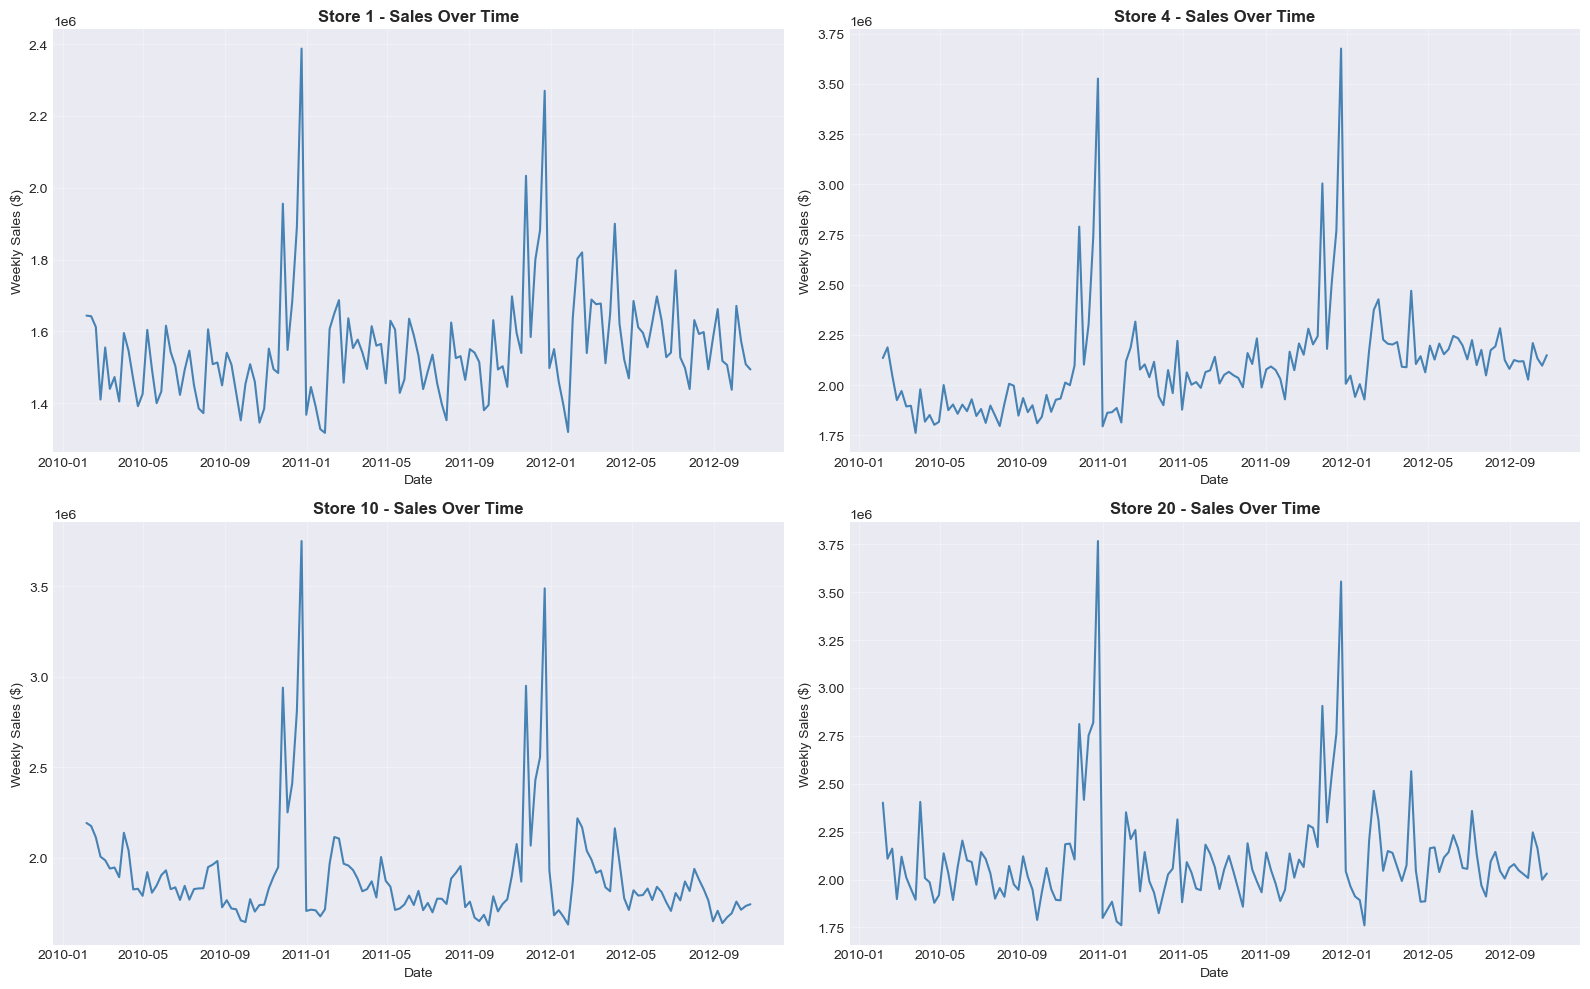

 Store-level analysis plots created!


In [8]:
# Select a few representative stores for detailed analysis
sample_stores = [1, 4, 10, 20]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, store in enumerate(sample_stores):
    store_data = df[df['Store'] == store].groupby('Date')['Weekly_Sales'].sum()
    
    axes[idx].plot(store_data.index, store_data.values, 
                   linewidth=1.5, color='steelblue')
    axes[idx].set_title(f'Store {store} - Sales Over Time', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Weekly Sales ($)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('store_level_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Store-level analysis plots created!")

In [9]:
print("\n" + "=" * 60)
print("EXPLORATORY ANALYSIS SUMMARY")
print("=" * 60)

print(f"\n DATASET OVERVIEW:")
print(f"  • Total observations: {len(df):,}")
print(f"  • Number of stores: {df['Store'].nunique()}")
print(f"  • Number of departments: {df['Dept'].nunique()}")
print(f"  • Time period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"  • Total weeks: {df['Date'].nunique()}")

print(f"\n SALES STATISTICS:")
print(f"  • Average weekly sales: ${df['Weekly_Sales'].mean():,.2f}")
print(f"  • Median weekly sales: ${df['Weekly_Sales'].median():,.2f}")
print(f"  • Std deviation: ${df['Weekly_Sales'].std():,.2f}")
print(f"  • Min sales: ${df['Weekly_Sales'].min():,.2f}")
print(f"  • Max sales: ${df['Weekly_Sales'].max():,.2f}")

print(f"\n SEASONALITY INSIGHTS:")
print(f"  • Holiday weeks: {df['IsHoliday'].sum():,} ({df['IsHoliday'].mean()*100:.1f}%)")
print(f"  • Avg holiday sales: ${df[df['IsHoliday']==1]['Weekly_Sales'].mean():,.2f}")
print(f"  • Avg non-holiday sales: ${df[df['IsHoliday']==0]['Weekly_Sales'].mean():,.2f}")
print(f"  • Holiday sales boost: {(df[df['IsHoliday']==1]['Weekly_Sales'].mean() / df[df['IsHoliday']==0]['Weekly_Sales'].mean() - 1) * 100:.1f}%")

print(f"\n TOP PERFORMERS:")
top_5_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(5)
print(f"  Top 5 Stores by Total Sales:")
for rank, (store, sales) in enumerate(top_5_stores.items(), 1):
    print(f"    {rank}. Store {store}: ${sales:,.0f}")

print("\n" + "=" * 60)
print(" EXPLORATORY ANALYSIS COMPLETE!")
print("=" * 60)

print("\n Files created:")
print("  • sales_distribution_analysis.png")
print("  • sales_time_series.png")
print("  • seasonality_analysis.png")
print("  • store_level_analysis.png")




EXPLORATORY ANALYSIS SUMMARY

 DATASET OVERVIEW:
  • Total observations: 421,570
  • Number of stores: 45
  • Number of departments: 81
  • Time period: 2010-02-05 to 2012-10-26
  • Total weeks: 143

 SALES STATISTICS:
  • Average weekly sales: $15,981.26
  • Median weekly sales: $7,612.03
  • Std deviation: $22,711.18
  • Min sales: $-4,988.94
  • Max sales: $693,099.36

 SEASONALITY INSIGHTS:
  • Holiday weeks: 29,661 (7.0%)
  • Avg holiday sales: $17,035.82
  • Avg non-holiday sales: $15,901.45
  • Holiday sales boost: 7.1%

 TOP PERFORMERS:
  Top 5 Stores by Total Sales:
    1. Store 20: $301,397,792
    2. Store 4: $299,543,953
    3. Store 14: $288,999,911
    4. Store 13: $286,517,704
    5. Store 2: $275,382,441

 EXPLORATORY ANALYSIS COMPLETE!

 Files created:
  • sales_distribution_analysis.png
  • sales_time_series.png
  • seasonality_analysis.png
  • store_level_analysis.png
